In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from tkinter import font
from turtle import color
from cairo import FontWeight
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
df_prepared = pd.read_csv('df_prepared.csv')

X = df_prepared.drop(columns=['price'])
y = df_prepared['price']

### Lasso regressor with polynomial features

In [4]:
#data ploting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [5]:
# Normalizing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating Ridge Regression model
ridge = Lasso()

# Setting hyperparameters web
param_grid = {
    'alpha': [1, 1.5, 2, 2.5, 10, 100]
}

# Using GridSearch to find best params
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1, 1.5, 2, 2.5, 10, 100]}, scoring='r2')

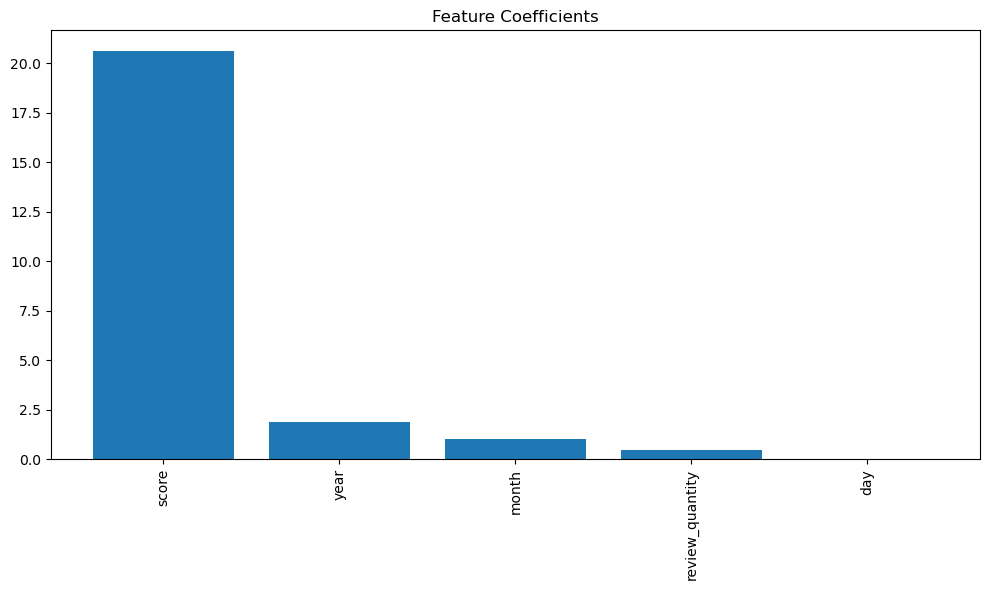

Best parameters: {'alpha': 1}
Accuracy MSE (Mean squared error):3461.601293967629
Testing MSE: 3612.3883233507863
Training R2: 0.12061337559792595
Testing R2: 0.13925533045822713
Cross validation (cv=5) R2 values: [0.10562601 0.11762288 0.12806185 0.14272687 0.13814456]
Cross validation  (cv=5) mean R2: 0.1264364335817419
Cross validation  (cv=10) R2 values: [0.1011338  0.11129729 0.116286   0.1174597  0.11638073 0.13954003
 0.14640376 0.14187343 0.12852991 0.14820135]
Cross validation  (cv=10) mean R2: 0.1267105985872311


In [6]:
# Best parameters
best_params = grid_search.best_params_

# Best model 
best_model = grid_search.best_estimator_

# Prognosing with best model
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Model evaluation
train_mse_l = mean_squared_error(y_train, y_train_pred)
test_mse_l = mean_squared_error(y_test, y_test_pred)
train_r2_l = r2_score(y_train, y_train_pred)
test_r2_l = r2_score(y_test, y_test_pred)

# Cross validation with full data set 
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])
X_combined_scaled = scaler.fit_transform(X_combined)

cv_scores_5 = cross_val_score(best_model, X_combined_scaled, y_combined, cv=5, scoring='r2')
cv_scores_10 = cross_val_score(best_model, X_combined_scaled, y_combined, cv=10, scoring='r2')

# Coefficients
coefficients = best_model.coef_
intercept = best_model.intercept_

# Coefficients visualisation
features = X.columns
indices = np.argsort(np.abs(coefficients))[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Coefficients")
plt.bar(range(X.shape[1]), coefficients[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

#Printing results
print(f'Best parameters: {best_params}')
print(f'Accuracy MSE (Mean squared error):{train_mse_l}')
print(f'Testing MSE: {test_mse_l}')
print(f'Training R2: {train_r2_l}')
print(f'Testing R2: {test_r2_l}')

print(f'Cross validation (cv=5) R2 values: {cv_scores_5}')
print(f'Cross validation  (cv=5) mean R2: {cv_scores_5.mean()}')

print(f'Cross validation  (cv=10) R2 values: {cv_scores_10}')
print(f'Cross validation  (cv=10) mean R2: {cv_scores_10.mean()}')

In [7]:
results_df = pd.DataFrame({
    'Metric': ['MSE', 'R2'],
    'Train': [train_mse_l, train_r2_l],
    'Test': [test_mse_l, test_r2_l]
})

results_df.to_csv('01_model_performance.csv', index=False)